In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [20]:
def show_img(titulo, img, cmap=None):
    if cmap == 'gray':
        plt.imshow(img, cmap=cmap)
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.title(titulo)
    plt.axis("off")
    plt.show()

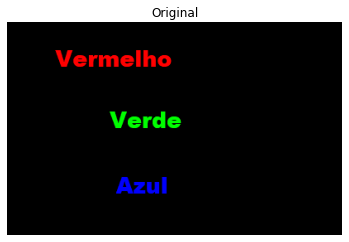

In [17]:
img = cv2.imread("resources/cores.png")
show_img("Original", img)

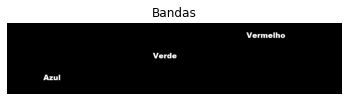

In [21]:
b, g, r = cv2.split(img)

lin, col, dim = img.shape

img3 = np.zeros([lin, col*3, ])
img3[0:lin, 0:col] = b[0:lin, 0:col]
img3[0:lin, col:2*col] = g
img3[0:lin, 2*col:3*col] = r

show_img("Bandas", img3, cmap='gray')

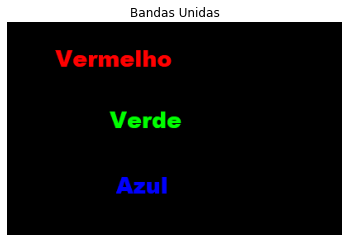

In [19]:
img_merged = cv2.merge([b,g,r])
show_img("Bandas Unidas", img_merged)

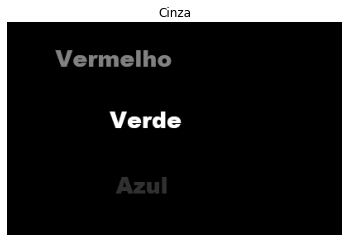

In [22]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_img("Cinza", gray, cmap='gray')

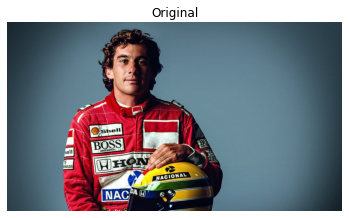

In [23]:
img = cv2.imread("resources/ayrton-senna.jpg")
show_img("Original", img)

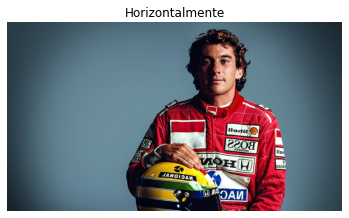

In [24]:
flipped = cv2.flip(img, 1)
show_img("Horizontalmente", flipped)

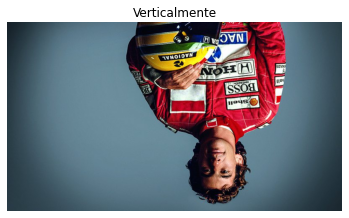

In [25]:
flipped = cv2.flip(img, -1)
show_img("Verticalmente", flipped)

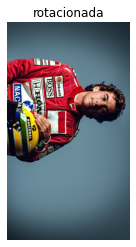

In [26]:
img_rot = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
show_img("rotacionada", img_rot)

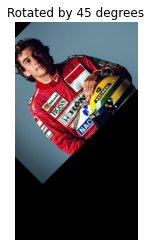

In [29]:
lin, col, dim = img.shape
(cX, cY) = (lin//2, col//2)
M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
rotated = cv2.warpAffine(img, M, (lin, col))
show_img("Rotated by 45 degrees", rotated)

Tipo da Imagem: uint8
Tamanho em pixels da imagem: 202500
linha = 300, col = 225


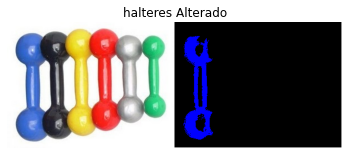

In [30]:
img = cv2.imread('resources/halteres.jpg')
[col, lin, dim] = img.shape
img2 = img.copy()
print(f"Tipo da Imagem: {img.dtype}")
print(f"Tamanho em pixels da imagem: {img.size}")
print(f"linha = {lin}, col = {col}")
for j in range(0, col-1):
    for i in range(0, lin-1):
        (b, g, r) = img[j, i]
        if (b>110 and b<255) and (g>80 and g<120) and (r>30 and r<80):
            b=255; g=0; r=0
            img2[j,i,] = np.array([b,g,r])
        else:
            img2[j,i,] = np.array([0,0,0])
img = cv2.hconcat([img, img2])
show_img("halteres Alterado", img)

In [ ]:
camera = cv2.VideoCapture(0)
outputFile = 'resources/cinza.avi'
(sucesso, frame) = camera.read()
vid_writer = cv2.VideoWriter(outputFile, cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), 60, (frame.shape[1], frame.shape[0]))
numero=1

while True:
    (sucesso, frame) = camera.read()
    if not sucesso:
        break
    # cv2.imwrite(f'resources/nome{str(numero)}.jpg', frame)
    # numero += 1   

    # lab = cv2.cvtColor(frame, cv2.COLOR_RGB2Lab)
    # vid_writer.write((lab).astype(np.uint8))

    frame_pb = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow("Exibindo video", frame_pb)
    if cv2.waitKey(1) & 0xFF == ord('s'):
        break
vid_writer.release()
cv2.destroyAllWindows()